In [3]:
import numpy as np
import matplotlib.pyplot as plt

#Default class for a 2D Ising model on a square lattice
class IsingModel:
    """2D Ising model on a square lattice."""

    def __init__(self, size: int, J: float = 1.0):
        '''Initalizes important parameters: 
        size:the size of our square lattice, and J:coupling strength between spins'''
        self.size = size
        self.J = J
        self.state = None

    def initialize_random(self, spin_up_fraction):
        '''creates state, a sizexsize square lattice of 1's and -1's. 
         spin_up_fraction determines % of lattice sites that are 1's. '''
        self.state = np.random.choice([-1, 1], size=(self.size, self.size),
                                      p=[1-spin_up_fraction, spin_up_fraction])
        return self.state

    def energy(self, state=None):
        '''Calculates change in energy based on intereaction with right-neighbor spins
          and down-neighbor spins'''
        if state is None:
            state = self.state

        energy = 0.0
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=1))
        energy -= self.J * np.sum(state * np.roll(state, -1, axis=0))
        return energy

    def magnetization(self, state=None):
        '''returns the magnetization = the average spin value'''
        if state is None:
            state = self.state
        return np.mean(state)

    def simulate(self, temperature, n_steps):  # Metropolis algorithm
        '''Uses the metropolis algorithm to keep or reject random spin flips. 
        Returns states, energies, and magnetizations.'''
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # Pick random spin
            i = np.random.randint(0, self.size)
            j = np.random.randint(0, self.size)

            # Flip it
            new_state = self.state.copy()
            new_state[i, j] *= -1

            # Metropolis criterion
            E_old = self.energy()
            E_new = self.energy(new_state)
            delta_E = E_new - E_old

            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                self.state = new_state

            if (step + 1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations

    def plot_ising_state(state, title="", ax=None):
        '''Renders an image of the spin state.'''
        if ax is None:
            fig, ax = plt.subplots(figsize=(6, 6))
        im = ax.imshow(state, cmap='YlGnBu', vmin=-1, vmax=1)
        ax.set_title(title)
        ax.axis('off')
        return ax





Lattice size: 100 x 100
Coupling strength J: 1.0
Initial energy: -3120.00
Initial magnetization: 0.39


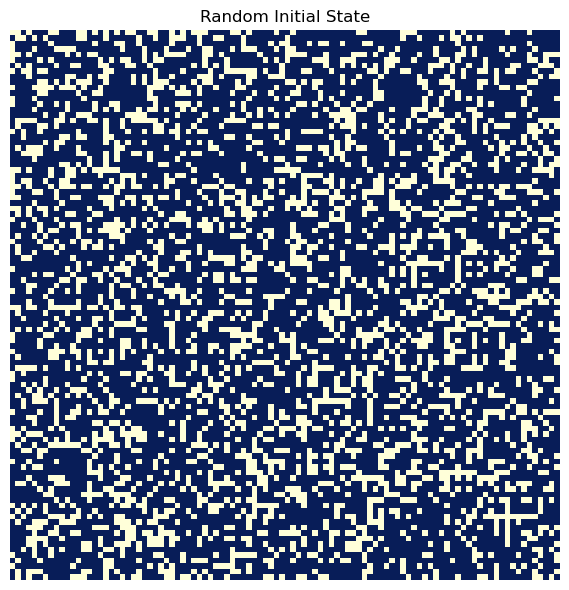

In [4]:
model = IsingModel(size=100, J=1.0)

initial_state = model.initialize_random(spin_up_fraction=0.7)# 70% spin up


print(f"Lattice size: {model.size} x {model.size}")
print(f"Coupling strength J: {model.J}")
print(f"Initial energy: {model.energy():.2f}")
print(f"Initial magnetization: {model.magnetization():.2f}")

# Visualize initial state
plt.figure(figsize=(6, 6))
plt.imshow(initial_state, cmap='YlGnBu')
plt.title('Random Initial State')
plt.axis('off')
plt.tight_layout()
plt.show()

T = 1.50
T = 1.61
T = 1.71
T = 1.82
T = 1.92
T = 2.03
T = 2.13
T = 2.24
T = 2.34
T = 2.45
T = 2.55
T = 2.66
T = 2.76
T = 2.87
T = 2.97
T = 3.08
T = 3.18
T = 3.29
T = 3.39
T = 3.50


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


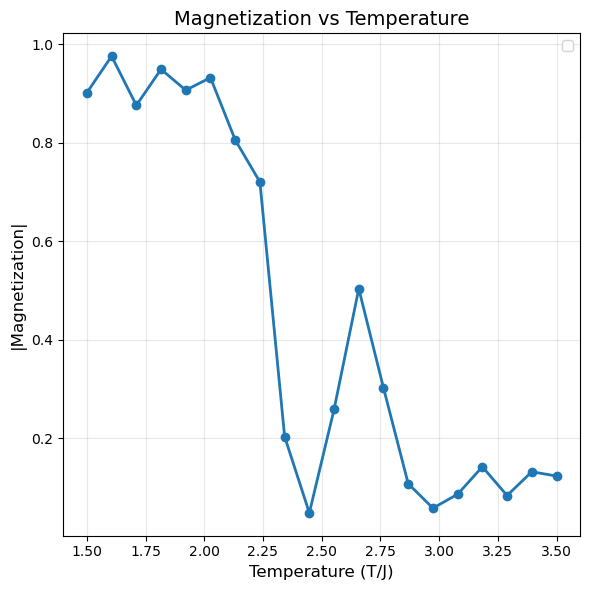

In [5]:
def find_phase_transition(size=20, temps=None, n_steps=10000, n_equilibration=5000):

    if temps is None:
        temps = np.linspace(1.5, 3.5, 20)

    magnetizations = []
    for T in temps:
        print(f"T = {T:.2f}")
        model = IsingModel(size=size)
        model.initialize_random(spin_up_fraction=0.7)

        # Run simulation
        states, energies, mags = model.simulate(T, n_steps)

        eq_idx = n_equilibration // 100
        mags_eq = np.array(mags[eq_idx:])

        mean_mag = np.mean(np.abs(mags_eq))
        magnetizations.append(mean_mag)

    return temps, magnetizations


# Run the simulation
temps, mags = find_phase_transition(size=20, n_steps=20000, n_equilibration=10000)

# Magnetization vs Temperature
plt.figure(figsize=(6, 6))
plt.plot(temps, mags, 'o-', markersize=6, linewidth=2)
plt.xlabel('Temperature (T/J)', fontsize=12)
plt.ylabel('|Magnetization|', fontsize=12)
plt.title('Magnetization vs Temperature', fontsize=14)
plt.grid(True, alpha=0.3)
plt.legend()
plt.tight_layout()
plt.show()




Simulating at T = 0.5


ValueError: too many values to unpack (expected 2)

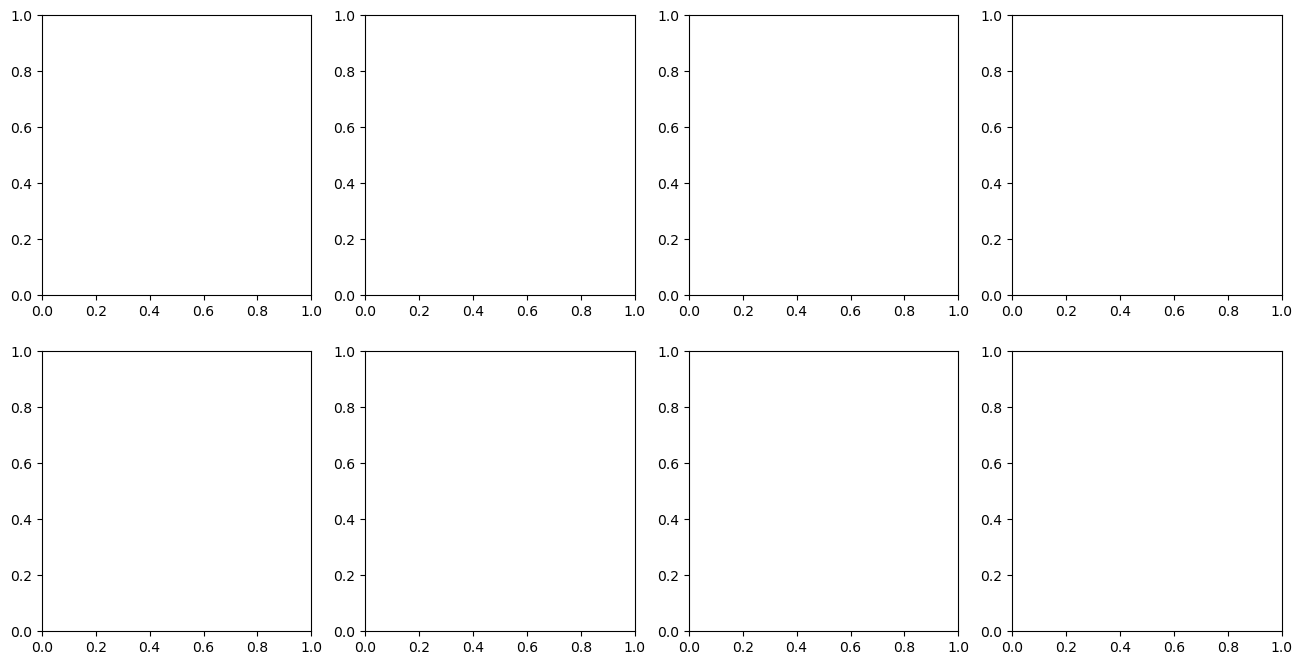

In [6]:
temperatures = [0.5, 1.5, 2.5, 4.0]

fig, axes = plt.subplots(2, 4, figsize=(16, 8))

for idx, T in enumerate(temperatures):
    print(f"\nSimulating at T = {T}")

    model = IsingModel(size=50, J=1.0) 

    initial = model.initialize_random(spin_up_fraction=0.7)

    states, energies = model.simulate(temperature=T, n_steps=50000)

    # Plot initial and final states
    axes[0, idx].imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[0, idx].set_title(f'T={T:.1f} (Initial)')
    axes[0, idx].axis('off')

    axes[1, idx].imshow(states[-1], cmap='YlGnBu', vmin=-1, vmax=1)
    axes[1, idx].set_title(f'T={T:.1f} (Final)')
    axes[1, idx].axis('off')

    final_mag = model.magnetization(states[-1])
    print(f"  Final magnetization: {abs(final_mag):.3f}")

plt.tight_layout()
plt.show()


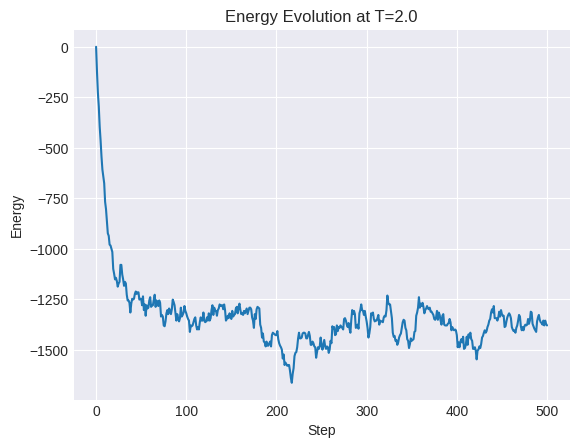

In [61]:
#Energy

T_test = 2.0
initial = model.initialize_random()

states, energies = model.simulate(temperature=T, n_steps=50000)



plt.plot(energies)
plt.xlabel('Step')
plt.ylabel('Energy')
plt.title(f'Energy Evolution at T={T_test}')
plt.show()



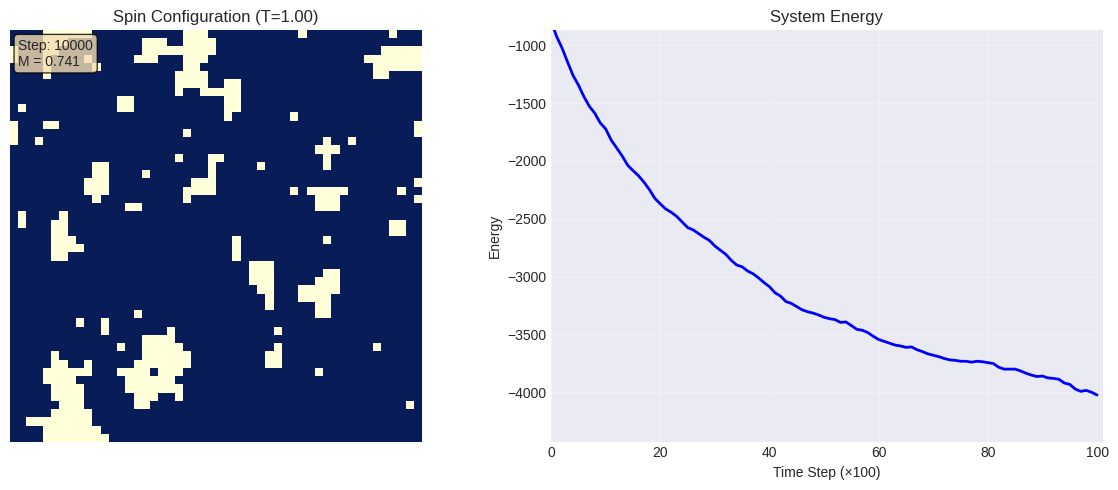

In [84]:
#Animation
def animate_ising(size=50, temperature=2.5, n_steps=10000, interval=50):
    """
    Create an animation of the Ising model evolution.

    Parameters:
    -----------
    size : int
        Lattice size
    temperature : float
        Temperature (critical temperature ~2.27)
    n_steps : int
        Number of Monte Carlo steps
    interval : int
        Delay between frames in milliseconds
    """
    # Initialize and run simulation
    model = IsingModel(size=size)
    model.initialize_random()
    states, energies = model.simulate(temperature, n_steps)

    # Set up the figure
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Spin configuration plot
    im = ax1.imshow(states[0], cmap='YlGnBu', vmin=-1, vmax=1, interpolation='nearest')
    ax1.set_title(f'Spin Configuration (T={temperature:.2f})', fontsize=12)
    ax1.axis('off')

    # Energy plot
    energy_line, = ax2.plot([], [], 'b-', linewidth=2)
    ax2.set_xlim(0, len(states))
    ax2.set_ylim(min(energies) * 1.1, max(energies) * 1.1)
    ax2.set_xlabel('Time Step (×100)')
    ax2.set_ylabel('Energy')
    ax2.set_title('System Energy')
    ax2.grid(True, alpha=0.3)

    # Text annotations
    mag_text = ax1.text(0.02, 0.98, '', transform=ax1.transAxes,
                        fontsize=10, verticalalignment='top',
                        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

    def init():
        im.set_data(states[0])
        energy_line.set_data([], [])
        mag_text.set_text('')
        return im, energy_line, mag_text

    def update(frame):
        # Update spin configuration
        im.set_data(states[frame])

        # Update energy plot
        x_data = list(range(frame + 1))
        y_data = energies[:frame + 1]
        energy_line.set_data(x_data, y_data)

        # Update magnetization text
        mag = np.mean(states[frame])
        mag_text.set_text(f'Step: {frame * 100}\nM = {mag:.3f}')

        return im, energy_line, mag_text

    anim = FuncAnimation(fig, update, init_func=init,
                        frames=len(states), interval=interval,
                        blit=True, repeat=True)

    plt.tight_layout()
    return anim


anim = animate_ising(size=50, temperature=1, n_steps=10000)
HTML(anim.to_jshtml())


In [7]:
import networkx as nx

class TriangularIsingModel(IsingModel):
    '''Ising Model on a triangular lattice.
    We'll use networkx to generate our triangular lattice, and then '''
    
    def __init__(self, size, J=1.0):
        super().__init__(size, J)
        self.G = nx.generators.lattice.triangular_lattice_graph(size, size) # Create triangular lattice graph
        
        # Convert node labels to (i,j) pairs, and make a list of nodes
        self.G = nx.convert_node_labels_to_integers(self.G, ordering="sorted") 
        self.nodes = list(self.G.nodes())
        # Dictionary to store spins
        self.state = {node: np.random.choice([-1, 1]) for node in self.nodes}

    def initialize_random(self, spin_up_fraction):
        '''Initalize each node as a 1 or -1, with given probability for spin_up_fraction'''
        self.state = {
            node: np.random.choice([-1, 1], p=[1-spin_up_fraction, spin_up_fraction])
            for node in self.nodes
        }
        return self.state

    def energy(self, state=None):
        '''Calcuates the energy of the state based on neighbors'''
        if state is None:
            state = self.state

        E = 0.0
        for u, v in self.G.edges():
            E -= self.J * state[u] * state[v]
        return E

    def magnetization(self, state=None):
        '''Evaluated mangetization (average spin) for lattice.'''
        if state is None:
            state = self.state
        return np.mean(list(state.values()))

    def simulate(self, temperature, n_steps):
        """Metropolis simulation on graph-based Ising model."""
        states = [self.state.copy()]
        energies = [self.energy()]
        magnetizations = [self.magnetization()]

        for step in range(n_steps):
            # pick random node
            node = np.random.choice(self.nodes)

            # propose flip
            new_state = self.state.copy()
            new_state[node] *= -1  

            # energies
            E_old = self.energy()
            E_new = self.energy(new_state)
            dE = E_new - E_old

            # Metropolis acceptance
            if dE < 0 or np.random.rand() < np.exp(-dE / temperature):
                self.state = new_state

            # record every 100
            if (step+1) % 100 == 0:
                states.append(self.state.copy())
                energies.append(self.energy())
                magnetizations.append(self.magnetization())

        return states, energies, magnetizations


Lattice size (triangular): 100 x 100
Coupling strength J: 1.0
Initial energy: -2858.00
Initial magnetization: 0.42


TypeError: Image data of dtype object cannot be converted to float

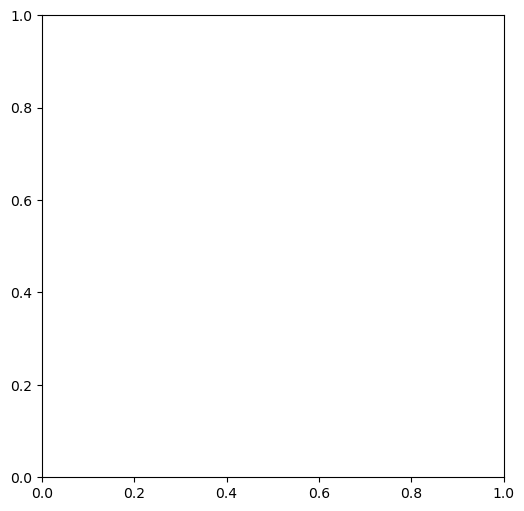

In [8]:
model = TriangularIsingModel(size=100, J=1.0)

initial_state = model.initialize_random(spin_up_fraction=0.7)# 70% spin up


print(f"Lattice size (triangular): {model.size} x {model.size}")
print(f"Coupling strength J: {model.J}")
print(f"Initial energy: {model.energy():.2f}")
print(f"Initial magnetization: {model.magnetization():.2f}")

# Visualize initial state
plt.figure(figsize=(6, 6))
plt.imshow(initial_state, cmap='YlGnBu')
plt.title('Random Initial State')
plt.axis('off')
plt.tight_layout()
plt.show()